In [18]:
import os
import numpy as np
import xml.etree.ElementTree as etree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_path = './bbox_dataset/images/'
annot_path = './bbox_dataset/annotations/'

In [33]:
len(os.listdir(img_path)), len(os.listdir(annot_path))

(6958, 6958)

In [12]:
annot_files = os.listdir(annot_path)

In [4]:
classes = os.listdir('./backup_bbox/images/')
classes

['cat',
 'motorbike',
 'car',
 'aeroplane',
 'chair',
 'sofa',
 'dog',
 'diningtable',
 'bicycle',
 'train',
 'tvmonitor',
 'bottle',
 'person',
 'bird']

In [7]:
ids = np.arange(len(classes))
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [16]:
partition = {}

for each_class in classes:
    fnames = []
    for annot_file in annot_files:
        f_path = annot_path + annot_file
        xml_file = etree.parse(f_path)
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls == each_class:
                fnames.append(annot_file.split('.')[0])
    partition[each_class] = fnames

In [31]:
def plot_class_distrib(dict_item):
    keys = np.arange(len(dict_item.keys()))
    values = [len(each_list) for each_list in dict_item.values()]
    plt.figure(figsize=(16, 8))
    rects = plt.bar(keys, values)
    autolabel(rects)
    plt.xticks(keys, dict_item.keys())

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

In [34]:
na_files = []
for annot_file in annot_files:
    count = 0
    f_path = annot_path + annot_file
    xml_file = etree.parse(f_path)
    root = xml_file.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        count += 1
    if count > 1:
        na_files.append(annot_file.split('.')[0])
len(na_files)

2711

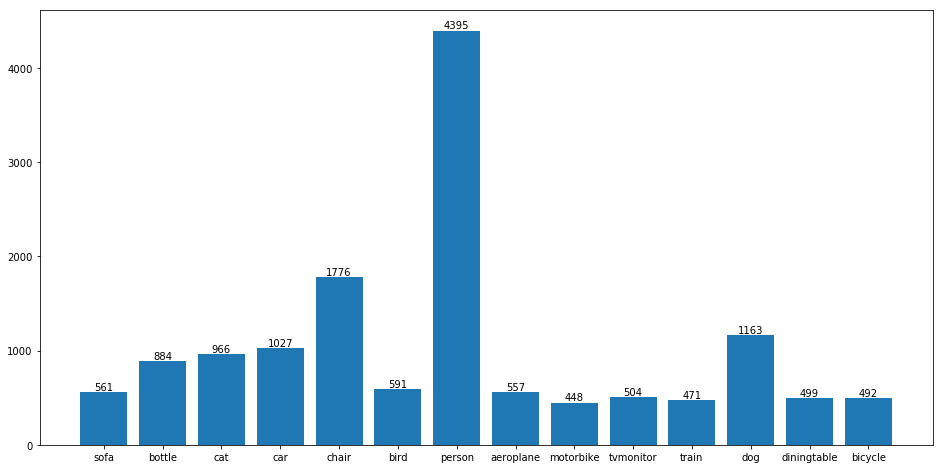

In [32]:
plot_class_distrib(partition)

In [36]:
total_objects_in_images = 0
for each_list in partition.values():
    total_objects_in_images += len(each_list)
total_objects_in_images

14334

#### Removing the files and images with more than one class

In [37]:
for each_file in na_files:
    img_file = img_path + each_file + '.jpg'
    annot_file = annot_path + each_file + '.xml'
    if os.path.exists(img_file) and os.path.exists(annot_file):
        os.remove(img_file)
        os.remove(annot_file)

In [39]:
# now there should be exactly 6958 (which is len(images_dir)) - 2711 (which is len(na_files))
6958 - 2711, len(os.listdir(img_path)), len(os.listdir(annot_path))

(4247, 4247, 4247)

In [40]:
new_partition = {}
annot_files = os.listdir(annot_path)
for each_class in classes:
    fnames = []
    for annot_file in annot_files:
        f_path = annot_path + annot_file
        xml_file = etree.parse(f_path)
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls == each_class:
                fnames.append(annot_file.split('.')[0])
    new_partition[each_class] = fnames

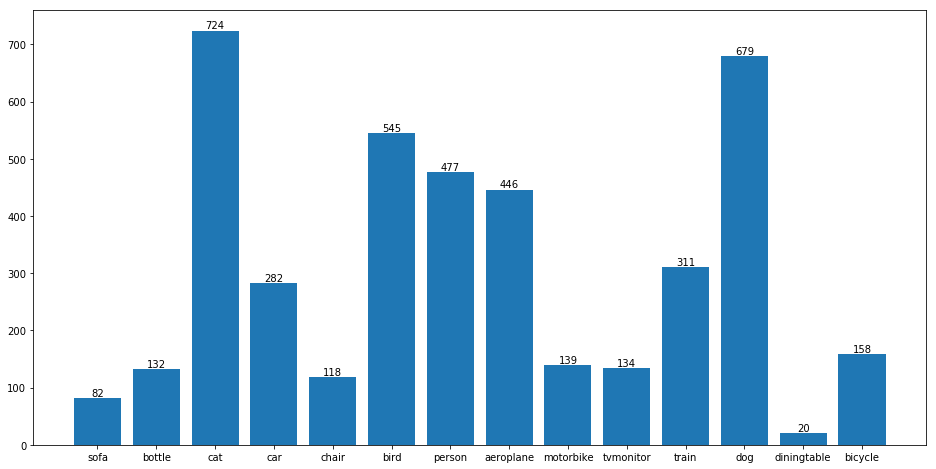

In [41]:
plot_class_distrib(new_partition)

#### Removing all the classes with class count (which is file count) less than 300

In [44]:
thresh = 300

# 1. First get all the classes with file count less threshold
# 2. Then remove all the files from the dataset and then that would be the final complete dataset

classes_na = {}
keys = new_partition.keys()
values = new_partition.values()
for each_class, file_list in zip(keys, values):
    if len(file_list) < thresh:
        print(each_class)
        classes_na[each_class] = file_list    

sofa
bottle
car
chair
motorbike
tvmonitor
diningtable
bicycle


In [45]:
classes_na.values()

dict_values([['2008_001030', '2008_001399', '2008_001787', '2008_002916', '2008_004271', '2008_004416', '2008_005623', '2008_005926', '2008_006276', '2008_006389', '2008_006784', '2008_007511', '2008_007733', '2008_008103', '2008_008106', '2008_008271', '2008_008313', '2008_008560', '2008_008574', '2008_008606', '2008_008628', '2008_008642', '2008_008772', '2009_000087', '2009_000242', '2009_000487', '2009_000732', '2009_000925', '2009_001107', '2009_001146', '2009_001268', '2009_001631', '2009_001731', '2009_001746', '2009_001980', '2009_002390', '2009_002611', '2009_002713', '2009_002998', '2009_003208', '2009_003394', '2009_003613', '2009_003843', '2009_003995', '2009_004298', '2009_004449', '2009_004464', '2009_004588', '2009_004839', '2010_000329', '2010_000830', '2010_001066', '2010_001327', '2010_001763', '2010_001962', '2010_002045', '2010_003169', '2010_004409', '2010_004765', '2010_005692', '2010_005734', '2010_005770', '2010_005980', '2010_006073', '2011_000070', '2011_00017

In [46]:
total_files_to_remove = 0

for each_list in classes_na.values():
    total_files_to_remove += len(each_list)
total_files_to_remove

1065

In [49]:
for each_list in classes_na.values():
    for each_file in each_list:
        img_file = img_path + each_file + '.jpg'
        annot_file = annot_path + each_file + '.xml'
        if os.path.exists(img_file) and os.path.exists(annot_file):
            os.remove(img_file)
            os.remove(annot_file)

In [50]:
# now there should be exactly 4247 - 1065 files

4247 - 1065, len(os.listdir(img_path)), len(os.listdir(annot_path))

(3182, 3182, 3182)

#### Finally looking at the final dataset with just single class in each image and the number of examples with bounding boxes greater than threshold which is 300

In [52]:
for each_class in classes_na.keys():
    del new_partition[each_class]

In [53]:
new_partition.keys()

dict_keys(['cat', 'bird', 'person', 'aeroplane', 'train', 'dog'])

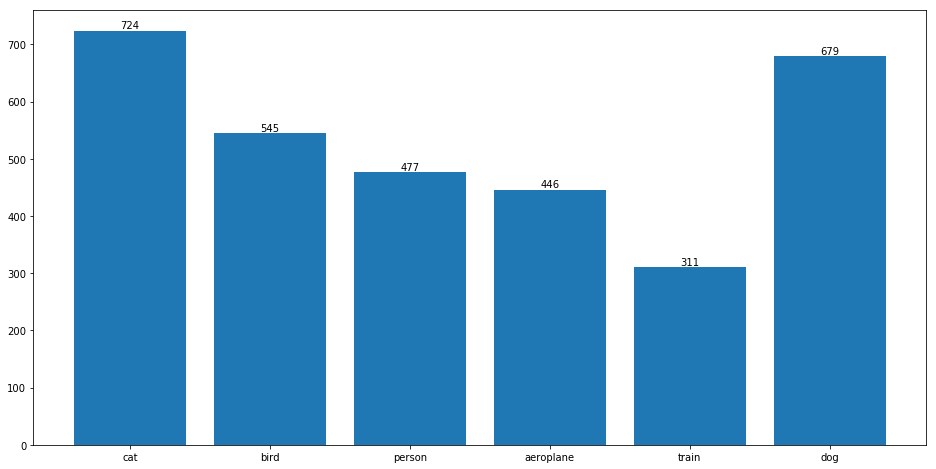

In [54]:
plot_class_distrib(new_partition)

#### Making validation split

In [55]:
valid_list = {'cat': 24, 'bird': 15, 'person': 10, 'aeroplane': 10, 'train': 10, 'dog': 20}

In [56]:
train_dataset = {}
valid_dataset = {}
for each_class in valid_list.keys():
    all_files = new_partition[each_class]
    train, valid = all_files[:len(all_files) - valid_list[each_class]], all_files[len(all_files) - valid_list[each_class]: ]
    train_dataset[each_class], valid_dataset[each_class] = train, valid

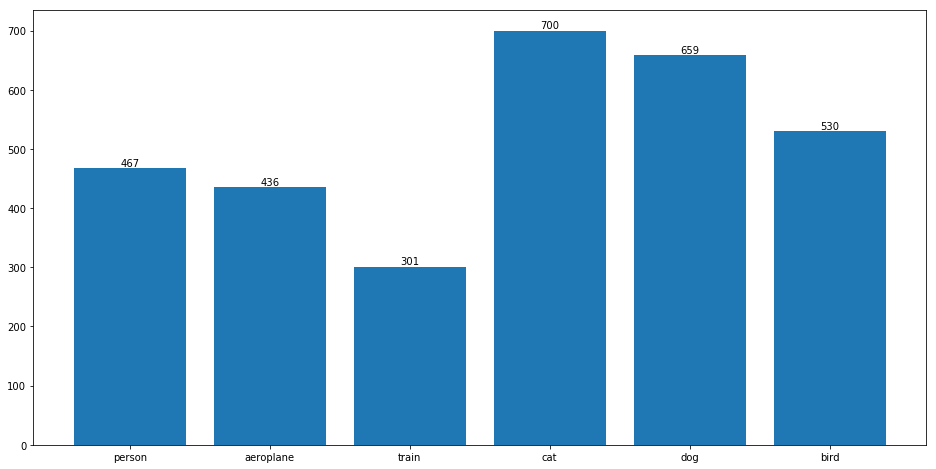

In [57]:
plot_class_distrib(train_dataset)

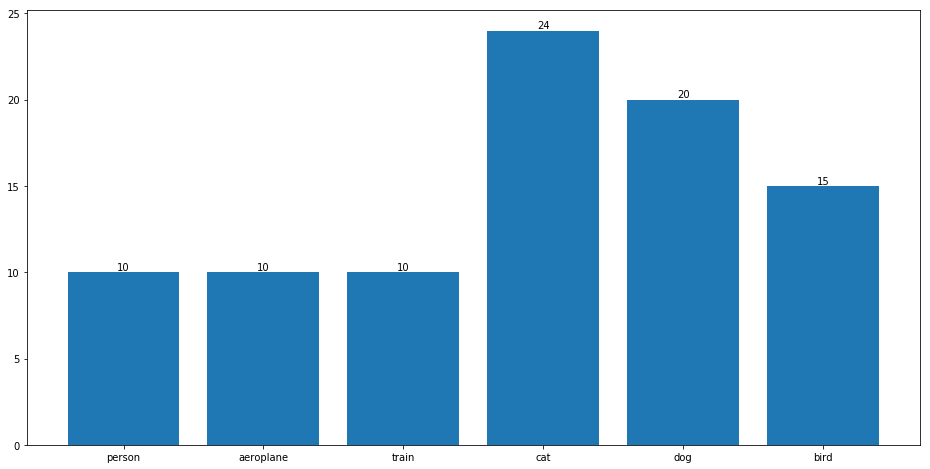

In [58]:
plot_class_distrib(valid_dataset)

#### Saving the file list as pickles

In [59]:
import pickle

In [60]:
with open('train_files_list.pkl', 'wb') as train_list:
    pickle.dump(train_dataset, train_list)
with open('valid_files_list.pkl', 'wb') as valid_list:
    pickle.dump(valid_dataset, valid_list)

##### Preparing the final dictionary where the classes are mixed and where there are only two keys 'train' with all the file names and 'valid' with all the file names as in https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly.html

In [66]:
train = []

for each_list in train_dataset.values():
    train += each_list

valid = []

for each_list in valid_dataset.values():
    valid += each_list
    
len(train), len(valid)

(3093, 89)

#### Getting the label files for the train and valid parts

In [111]:
all_files = train + valid
len(all_files)

3182

In [121]:
labels_with_class_bndbox = {}
labels_bbox_only = {}
for each_file in all_files:
    annot_file = annot_path + each_file + '.xml'
    xml_file = etree.parse(annot_file)
    root = xml_file.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        xmin = int(round(float(obj.find('bndbox').find('xmin').text)))
        ymin = int(round(float(obj.find('bndbox').find('ymin').text)))
        xmax = int(round(float(obj.find('bndbox').find('xmax').text)))
        ymax = int(round(float(obj.find('bndbox').find('ymax').text)))
    labels_with_class_bndbox[each_file] = [cls, (xmin, ymin, xmax, ymax)]
    labels_bbox_only[each_file] = (xmin, ymin, xmax, ymax)

In [118]:
final_partition = {}
final_partition['train'] = train
final_partition['valid'] = valid

In [122]:
with open('final_parition.pkl', 'wb') as part_file:
    pickle.dump(final_partition, part_file)
with open('labels_class_boxes.pkl', 'wb') as class_boxes:
    pickle.dump(labels_with_class_bndbox, class_boxes)
with open('labels_bbox_only.pkl', 'wb') as bboxes_only:
    pickle.dump(labels_bbox_only, bboxes_only)

In [123]:
labels_bbox_only

{'2008_006954': (1, 1, 500, 196),
 '2009_001333': (29, 111, 467, 315),
 '2010_002827': (15, 14, 500, 143),
 '2009_003985': (75, 74, 500, 170),
 '2008_003830': (29, 23, 149, 218),
 '2008_000842': (85, 406, 106, 498),
 '2008_000116': (44, 86, 321, 319),
 '2008_007891': (185, 53, 328, 282),
 '2008_006619': (7, 103, 495, 227),
 '2010_003933': (4, 67, 500, 284),
 '2010_004402': (74, 1, 395, 375),
 '2010_002310': (62, 139, 445, 268),
 '2008_002843': (179, 113, 257, 313),
 '2011_002055': (66, 94, 437, 460),
 '2008_004273': (1, 23, 469, 295),
 '2010_001147': (31, 83, 500, 277),
 '2009_005211': (1, 103, 369, 339),
 '2008_003655': (1, 173, 417, 263),
 '2008_002185': (239, 82, 500, 375),
 '2008_000382': (1, 97, 282, 500),
 '2008_002681': (165, 134, 328, 465),
 '2010_005492': (7, 15, 460, 393),
 '2010_004301': (189, 125, 302, 284),
 '2008_008537': (214, 172, 281, 240),
 '2009_003922': (211, 81, 367, 208),
 '2010_000098': (146, 154, 419, 353),
 '2009_002222': (5, 62, 400, 500),
 '2008_004692': (103

#### Finally organized the data into the required format, for traning I will be using only labels with bbox alone

(224, 224, 3)


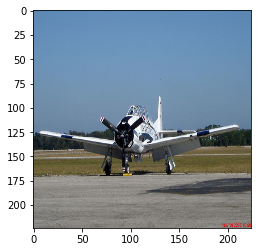

In [127]:
test_img = imread('./bbox_dataset/images/2008_000021.jpg')
test_img = resize(test_img, (224, 224), mode='reflect')
plt.imshow(test_img)
print(test_img.shape)

In [124]:
from skimage.io import imread
from skimage.transform import resize

In [139]:
import numpy as np


class DataGenerator(object):

    def __init__(self, dim_x = 224, dim_y = 224, channels = 3, batch_size = 32, shuffle = True):
        'Initialization'
        self.dim_x = dim_x
        self.dim_y = dim_y
        self.dim_z = channels
        self.batch_size = batch_size
        self.shuffle = shuffle

    def generate(self, labels, list_IDs):
        'Generates batches of samples'
        # Infinite loop
        while 1:
        # Generate order of exploration of dataset
            indexes = self.__get_exploration_order(list_IDs)

            # Generate batches
            imax = int(len(indexes)/self.batch_size)
            for i in range(imax):
            # Find list of IDs
                list_IDs_temp = [list_IDs[k] for k in indexes[i*self.batch_size:(i+1)*self.batch_size]]

                # Generate data
                X, y = self.__data_generation(labels, list_IDs_temp)

                yield X, y

    def __get_exploration_order(self, list_IDs):
        'Generates order of exploration'
        # Find exploration order
        indexes = np.arange(len(list_IDs))
        if self.shuffle == True:
            np.random.shuffle(indexes)
        return indexes

    def __data_generation(self, labels, list_IDs_temp):
        'Generates data of batch_size samples' # X : (n_samples, v_size, v_size, v_size, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim_x, self.dim_y, self.dim_z))
        y = np.empty((self.batch_size, 4), dtype = int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            
            img = imread('./bbox_dataset/images/'+ID+'.jpg')
            img = resize(img, (self.dim_x, self.dim_y), mode='reflect')
            
            X[i] = img

            # Store volume
            #X[i, :, :, :, 0] = np.load(ID + '.npy')

            # Store class
            y[i] = labels[ID]

        return X, y


In [140]:
# Parameters
params = {'dim_x': 224,
          'dim_y': 224,
          'channels': 3,
          'batch_size': 16,
          'shuffle': False}

# Datasets
partition = final_partition # IDs
labels = labels_bbox_only # Labels

# Generators
training_generator = DataGenerator(**params).generate(labels, partition['train'])
validation_generator = DataGenerator(**params).generate(labels, partition['valid'])


In [142]:
for x_train, y_train in training_generator:
    print(x_train.shape, y_train.shape)

(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 224, 3) (16, 4)
(16, 224, 22

KeyboardInterrupt: 

In [143]:
2+2

4